**In this notebook we will take a look at debugging/optimizing machine learning model**  


**Quick question**
- Do you want me to focus mostly on the debugging itself and how it's done?
- Do you want me to carry the workshop out as if you were just introduced to machine learning?

# Agenda for today
- 1. Intro to what is machine learning debugging and what/how can we use it
- 2. High Level Debugging example TextBlob
- 3. Overfitting/Underfitting example and explanantion
- Test set/ Train set separation why is it important?
- Bias / Variance trade off 
- Real life example *   

*if we have time :D

# 1. Intro to what is machine learning debugging and what/how can we use it

**Machine learning debugging (In my own words)**
- Set of various acitivities/procedures that allow you to better understand the insights of your ML models
- it allows you to


**Question: What is the purpose behind it ?**

- _To understand why the machine learning model is behaving poorly and what we can do to fix it_
- _To improve the results of machine learning model_
- _To decrease the resources need for training the ML models_

**Speaking in terms of regular code, let's assume you have a method that has some desired functionality. You start using that method but you soon realise it does not work - what do you do?. Well you debug it :)**

**Question: What if you want to use as minor part of your software where you don't really care about the inside implementation?**
- _There are tons of already implemented libraries ready to use, perhaps you could use one of those instead of writting your own tool. But this libraries might be incomplete, generic or simply bad. Knowing how to debug this tools might help you to fix it_  

**Let us say you have an online shop and you want to promote it on facebook/twitter. After making a post on FB/Twitter you want to fish for negative comments, afterwards you want your representative to contact unsatisfied customers** 

**So let's do that using open source library [TextBlob](https://textblob.readthedocs.io/en/dev/)**

* First: let's import textblob  
* Second: run an example and see what we get

In [6]:
from textblob import TextBlob  # import the library

print (TextBlob('I hate this thing').sentiment)  # calculate the sentiment of the string and print the value
print (TextBlob('I think this is a good tool for carpenters').sentiment)  # calculate the sentiment of the string and print the value

Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)


**Textblob().sentiment returns two things**
- first value it returns is the polarity of the comment: _-1_ is a negative comment and _1_ it is a positive comment
- second value is the subjectivity of the comment

**Okay, as we know what textblob does we can then create a list of comments and our function**

In [168]:
comments_friday = ['I hate this product', 
                   'I enjoyed this movie',
                   'Look at my profile please [link]',
                   'I wish I hadn`t buy it',
                   'This sucks I want my money back']

comments_monday = ['I think this product is awesome',
                   'That is the best shirt I ever had',
                   'I want moreeee!',
                   'that`s so cool',
                   'Just :/']

**Below is a simple function that will take a list of comments and return same size list of values from <-1, 1> describing the sentiment of the comment**

In [169]:
def caluclate_sentiment(comments):
    """
    Function returns a sentiment for given list of comments
    
    :param comments: list of comments to be evaluated
    :return: list of sentiment values
    """
    
    sentiments = []  # create an empty list
    
    for comment in comments:  # iterate over the comments
        sentiment_value = TextBlob(comment).sentiment[0]  # Get sentiment of current comment
        sentiments.append(sentiment_value)  # append to the list
        
    return sentiments       

**Let's use our method and see how it calculated the sentiment**

### Sentiments for Friday

In [170]:
sentiments_friday = caluclate_sentiment(comments_friday)

for sentence, sentiment in zip(comments_friday, sentiments_friday):  # print sentence and it;
    print (f'{sentence} || sentiment`s polarity is: {sentiment}')

I hate this product || sentiment`s polarity is: -0.8
I enjoyed this movie || sentiment`s polarity is: 0.5
Look at my profile please [link] || sentiment`s polarity is: 0.0
I wish I hadn`t buy it || sentiment`s polarity is: 0.0
This sucks I want my money back || sentiment`s polarity is: -0.15


### Sentiments for Monday

In [171]:
sentiments_monday = caluclate_sentiment(comments_monday)

for sentence, sentiment in zip(comments_monday, sentiments_monday):  # print sentence and its sentiment
    print (f'{sentence} || sentiment`s polarity is: {sentiment}')

I think this product is awesome || sentiment`s polarity is: 1.0
That is the best shirt I ever had || sentiment`s polarity is: 1.0
I want moreeee! || sentiment`s polarity is: 0.0
that`s so cool || sentiment`s polarity is: 0.35
Just :/ || sentiment`s polarity is: -0.25


**We can see that the textblob works properly for most of the examples**  
**Unfortunately there are some that it failed to categorize:**
- I want moreeee! || sentiment's polarity is: 0.0
- I wish I haven't bought it || sentiment's is: 0.0

**Can you think of a way how we could perhaps fix "I want moreeee!" comment?**
<!--print (TextBlob('I want more!').sentiment) -->

In [172]:
TextBlob('I want moreeee').sentiment


Sentiment(polarity=0.0, subjectivity=0.0)

**How about the I wish "I haven't bought it" ?**
<!-- TextBlob('I wish did not buy it').sentiment -->

In [143]:
TextBlob("I wish hadn't buy it").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

### Let's take a closer look at different adjectives

In [21]:
print(TextBlob('bad desk').sentiment)
print()
print(TextBlob('worst desk').sentiment)
print()
print(TextBlob('good player').sentiment)
print()
print(TextBlob('best player').sentiment)

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

Sentiment(polarity=-1.0, subjectivity=1.0)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

Sentiment(polarity=1.0, subjectivity=0.3)


### Spoiler alert:
- Text blob is a simple tool involving of nothing more than grammar analysis
- It is basically trying to give the best anwser using the analysis of the adjectives*
- State of the art libraries use neural networks combined using lexical analysis

*Some examples of what I mean by analysis of adjectives

In [28]:
print(TextBlob('This is not the best book').sentiment)
print()
print(TextBlob('I don`t think it was good').sentiment)

Sentiment(polarity=1.0, subjectivity=0.3)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)


### That is not right is it?

**Congratulations we just did some manual debugging of TextBlob model**  

**We found out that:**
- our model has problems with typos
- our model has problem with understanding the negation of the sentece


**Even if you are not a ML engineer and you have limited NLP(natural language processing) skills you could try to:**
- write a function that would spell check all of the strings in the comments and attempt fix it (TextBlob has such a method)
- try to play around with negation in the sentences for most common: "Do not" "have not"  to move it towards the adjective



# 3. Overfitting/Underfitting

![](https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-LvNWUoWieQqaGmU_gl9%2F-LvNoby-llz4QzAK15nL%2Fimage.png?alt=media&token=41720ce9-bb66-4419-9bd8-640abf1fc415)
Source: Sagar Sharma / Towards Data Science

**Noise of the data is the level to which it i random**

**Overfitting is when the machine learning model learn the randomness of the data instead of it's real function**

**Optimum is when machine learning model succced to find the function, that almost represent the real data distrubution**

**Underfitting is when machine learning model uses too general function



No handles with labels found to put in legend.


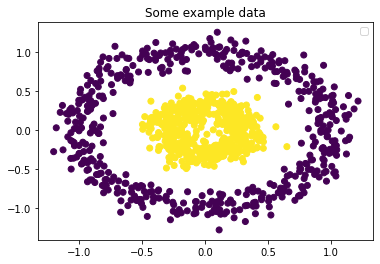

In [142]:
import sklearn
data, labels = sklearn.datasets.make_circles(n_samples=1000, 
                               shuffle=True, noise=0.1, random_state=None, factor=0.3)  # create some data in a circle
x = data[:,0]
y = data[:,1]
plt.scatter(x,y, c=labels)
plt.title("Distribution of Example data")


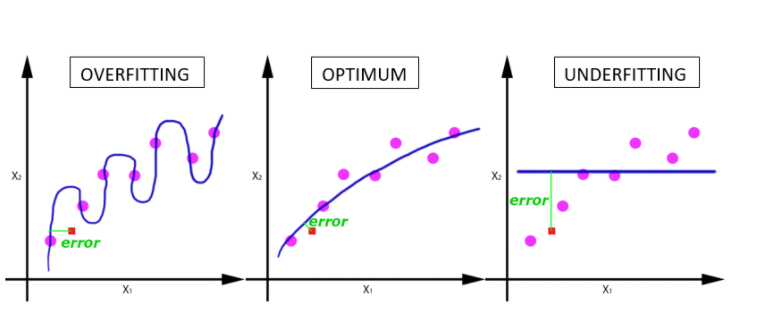

In [133]:
from sklearn.linear_model import LogisticRegression as LR


data_square = np.square(data)
combined_array = np.append(data, data_square, axis=1)
# combined_array

model = LR().fit(combined_array, labels)

y_pred = model.predict(combined_array)


In [ ]:
from sklearn.linear_model import LogisticRegression as LR


data_square = np.square(data)
combined_array = np.append(data, data_square, axis=1)
# combined_array

model = LR().fit(combined_array, labels)

y_pred = model.predict(combined_array)


In [134]:
arr = [1,2,3,4]
np.square(arr)

array([ 1,  4,  9, 16], dtype=int32)

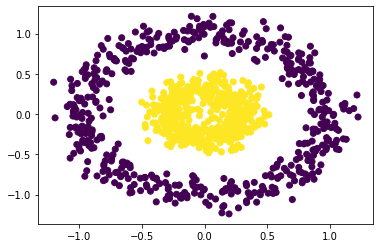

In [135]:
plt.scatter(y,x, c=y_pred)
